In [10]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

s = pd.read_csv('cancer patient data sets.csv')
s= s.values
x = s[:,2:25]
y = s[:,25]
kf = KFold(n_splits=10, random_state=0,shuffle=True)
print(kf)


KFold(n_splits=10, random_state=0, shuffle=True)


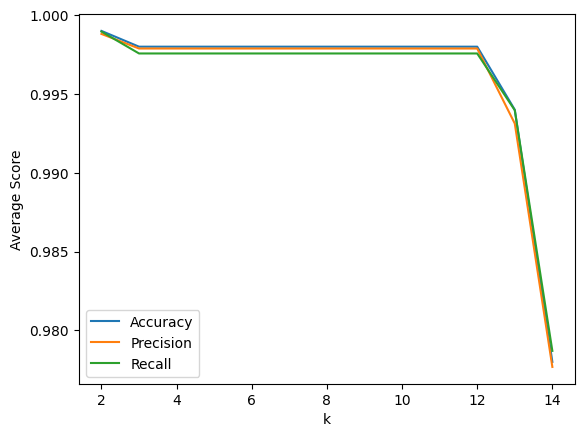

In [2]:
avg_acc_list = []
avg_pre_list = []
avg_rec_list = []

for k in range(2, 15):
    neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    avg_acc = np.zeros(10)
    avg_pre = np.zeros(10)
    avg_rec = np.zeros(10)
    i = 0

    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        avg_acc[i] = acc
        avg_pre[i] = pre
        avg_rec[i] = rec
        i += 1

    # print('k =', k)
    # print("avg_acc:", avg_acc)
    # print("Akurasi AVG:", np.average(avg_acc))
    # print("avg_pre:", avg_pre)
    # print("Presisi AVG:", np.average(avg_pre))
    # print("avg_rec:", avg_rec)
    # print("Recall AVG:", np.average(avg_rec))

    avg_acc_list.append(np.average(avg_acc))
    avg_pre_list.append(np.average(avg_pre))
    avg_rec_list.append(np.average(avg_rec))


plt.plot(range(2, 15), avg_acc_list)
plt.plot(range(2, 15), avg_pre_list)
plt.plot(range(2, 15), avg_rec_list)

plt.xlabel('k')
plt.ylabel('Average Score')
plt.legend(['Accuracy', 'Precision', 'Recall'])
plt.show()


In [40]:
neigh2= KNeighborsClassifier(n_neighbors=2, metric='euclidean')
neigh2.fit(x,y)
l = neigh2.predict([[33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4]])
m = neigh2.predict([[17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2]])
h = neigh2.predict([[35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2]])
train = neigh2.predict([[13,9,9,9,6,1,6,9,6,2,5,2,2,2,3,1,1,7,9,2,1,3,2]])

print(train[0])


Medium
